In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow import keras
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models, layers

Using TensorFlow backend.


In [2]:
reuters = tf.keras.datasets.reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [6]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# y_train = to_one_hot(y_train)
# y_test = to_one_hot(y_test)

from keras.utils.np_utils import to_categorical

y_train_1_hot = to_categorical(y_train)
y_test_1_hot = to_categorical(y_test)

In [7]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train_1_hot, epochs=20, validation_split=0.20)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 10s 1ms/step - loss: 1.5287 - acc: 0.6619 - val_loss: 1.1144 - val_acc: 0.7524
Epoch 2/20
7185/7185 [==============================] - 8s 1ms/step - loss: 0.8149 - acc: 0.8195 - val_loss: 0.9807 - val_acc: 0.7869
Epoch 3/20
7185/7185 [==============================] - 8s 1ms/step - loss: 0.5129 - acc: 0.8850 - val_loss: 0.9387 - val_acc: 0.8036
Epoch 4/20
7185/7185 [==============================] - 7s 1ms/step - loss: 0.3487 - acc: 0.9236 - val_loss: 1.0036 - val_acc: 0.8036
Epoch 5/20
7185/7185 [==============================] - 6s 877us/step - loss: 0.2548 - acc: 0.9443 - val_loss: 1.0094 - val_acc: 0.8091
Epoch 6/20
7185/7185 [==============================] - 6s 880us/step - loss: 0.2084 - acc: 0.9543 - val_loss: 1.1422 - val_acc: 0.7969
Epoch 7/20
7185/7185 [==============================] - 6s 881us/step - loss: 0.1789 - acc: 0.9560 - val_loss: 1.1934 - val_acc: 0.7969
Epoch 8

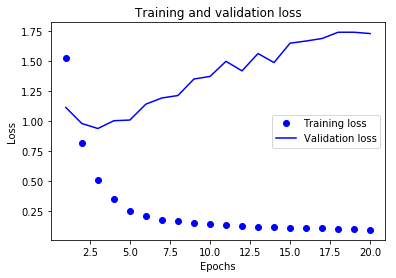

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

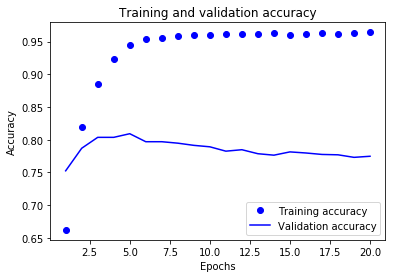

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
results = model.evaluate(x_test, y_test_1_hot)

2246/2246 [==============================] - 1s 298us/step


In [12]:
results

[1.9006836577812052, 0.7689225289934146]

In [13]:
predictions = model.predict(x_test)

In [17]:
np.argmax(predictions[300])

3

In [18]:
y_test[300]

3

In [28]:
# A model with an information bottleneck

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history2 = model2.fit(x_train, y_train_1_hot, epochs=20, batch_size=128, validation_split=0.20)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 5s 639us/step - loss: 2.6488 - acc: 0.3942 - val_loss: 2.0754 - val_acc: 0.5298
Epoch 2/20
7185/7185 [==============================] - 2s 315us/step - loss: 1.7701 - acc: 0.5438 - val_loss: 1.6946 - val_acc: 0.5392
Epoch 3/20
7185/7185 [==============================] - 2s 311us/step - loss: 1.4741 - acc: 0.5797 - val_loss: 1.5531 - val_acc: 0.6166
Epoch 4/20
7185/7185 [==============================] - 2s 311us/step - loss: 1.3127 - acc: 0.6615 - val_loss: 1.4988 - val_acc: 0.6416
Epoch 5/20
7185/7185 [==============================] - 2s 317us/step - loss: 1.1914 - acc: 0.6991 - val_loss: 1.4721 - val_acc: 0.6578
Epoch 6/20
7185/7185 [==============================] - 2s 307us/step - loss: 1.0986 - acc: 0.7204 - val_loss: 1.4818 - val_acc: 0.6700
Epoch 7/20
7185/7185 [==============================] - 2s 313us/step - loss: 1.0224 - acc: 0.7356 - val_loss: 1.4731 - val_acc: 0.6750


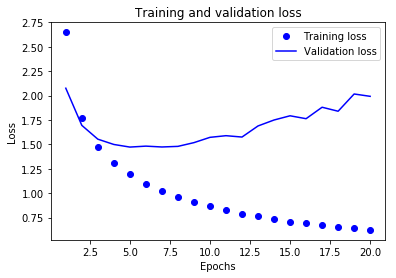

In [30]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()